# <span style="font-size: 50px; color:purple">Trabalho final Introdução a Ciência de Dados </span>
# <span style="font-size: 22px; color:white">"As palavras chave do filme tem relação com o gênero? É possível prever o gênero a partir das palavras chave?" </span>
# <span style="font-size: 15px; color:white">Diogo Tuler Chaves (2022043663) </span>




## <span style="color:white">Blibiotecas Usadas</span>


In [2]:
import pandas as pd
from collections import Counter
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import time
import random
from tqdm import tqdm


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


## <span style="color:white">Tratamento dos dados</span>


In [168]:
df1 = pd.read_csv("data/movies_metadata.csv")
df2 = pd.read_csv("data/keywords.csv")

/tmp/ipykernel_82197/3588488270.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("data/movies_metadata.csv")


In [5]:
df1 = df1.drop(columns=["budget","original_language","popularity","production_companies","release_date","revenue","status","vote_average","vote_count","imdb_id","original_title","spoken_languages","adult","belongs_to_collection","homepage","overview","poster_path","runtime","video","tagline","production_countries"])
df1['id'] = pd.to_numeric(df1['id'], errors='coerce')
df1 = df1.dropna()

In [6]:
df1['id'] = pd.to_numeric(df1['id'], errors='coerce')

In [7]:
df1['id'] = df1['id'].astype('int64')

In [9]:
final = pd.merge(df1, df2, on='id')
final = final.query("keywords != '[]' and genres != '[]'")
final.reset_index(inplace=True)
final = final.drop(columns=['index'])
final

,genres,id,title,keywords
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,Toy Story,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,Jumanji,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,Grumpier Old Men,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,Waiting to Exhale,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,"[{'id': 35, 'name': 'Comedy'}]",11862,Father of the Bride Part II,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...
31274,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",84419,House of Horrors,"[{'id': 9748, 'name': 'revenge'}, {'id': 9826,..."
31275,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",390959,Shadow of the Blair Witch,"[{'id': 224180, 'name': 'blair witch'}]"
31276,"[{'id': 27, 'name': 'Horror'}]",289923,The Burkittsville 7,"[{'id': 616, 'name': 'witch'}, {'id': 2035, 'n..."
31277,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,Subdue,"[{'id': 10703, 'name': 'tragic love'}]"


Todas as análises serão feitas usando a tabela acima

In [10]:
g = final["genres"].apply(ast.literal_eval)
generos = pd.DataFrame(columns=['id','name'])
for movie in g:
    for item in movie:
        info = pd.DataFrame([item])
        info = info[['id','name']]
        generos =  pd.concat([generos, info])

In [11]:
generos = generos.drop_duplicates(subset=['id'])
generos = generos.sort_values(by='id', ascending=True)
generos

,id,name
0,12,Adventure
0,14,Fantasy
0,16,Animation
0,18,Drama
0,27,Horror
0,28,Action
0,35,Comedy
0,36,History
0,37,Western
0,53,Thriller


Esses são todos os gêneros que iremos trabalhar

In [12]:
g = final["genres"].apply(ast.literal_eval)
kw = final["keywords"].apply(ast.literal_eval)
analise = pd.DataFrame(columns=['id','title','gender','keywords'])

for k in range(final.shape[0]):
    ids = final.loc[k,["id"]]
    ids = int(ids.iloc[0])
    ttle = final.loc[k,["title"]]
    ttle = str(ttle.iloc[0])
    keyw = []
    for item in kw[k]:
        keyw.append(str(item['name']))
    for item in g[k]:
        info = pd.DataFrame([item])
        info = info.drop(columns=['id'])
        info['id'] = ids
        info['title'] = ttle
        info.loc[:, 'keywords'] = [keyw]
        info = info.rename(columns={'name': 'gender'})
        info = info[['id','title','gender','keywords']]
        analise = pd.concat([analise, info])

        
analise

,id,title,gender,keywords
0,862,Toy Story,Animation,"[jealousy, toy, boy, friendship, friends, riva..."
0,862,Toy Story,Comedy,"[jealousy, toy, boy, friendship, friends, riva..."
0,862,Toy Story,Family,"[jealousy, toy, boy, friendship, friends, riva..."
0,8844,Jumanji,Adventure,"[board game, disappearance, based on children'..."
0,8844,Jumanji,Fantasy,"[board game, disappearance, based on children'..."
...,...,...,...,...
0,390959,Shadow of the Blair Witch,Horror,[blair witch]
0,289923,The Burkittsville 7,Horror,"[witch, mythology, legend, serial killer, mock..."
0,439050,Subdue,Drama,[tragic love]
0,439050,Subdue,Family,[tragic love]


In [13]:
result = analise.groupby('gender')['keywords'].sum().reset_index()
result

,gender,keywords
0,Action,"[robbery, detective, bank, obsession, chase, s..."
1,Adventure,"[board game, disappearance, based on children'..."
2,Animation,"[jealousy, toy, boy, friendship, friends, riva..."
3,Comedy,"[jealousy, toy, boy, friendship, friends, riva..."
4,Crime,"[robbery, detective, bank, obsession, chase, s..."
5,Documentary,"[narration, hollywood, prostitution, fascism, ..."
6,Drama,"[based on novel, interracial relationship, sin..."
7,Family,"[jealousy, toy, boy, friendship, friends, riva..."
8,Fantasy,"[board game, disappearance, based on children'..."
9,Foreign,"[independent film, fascism, auschwitz, typhus,..."


Aqui em cima eestão todas as palavras usadas por cada gênero

## <span style="color:white">BOW + Machine Learning</span>


### <span style="color:white">BOW</span>


In [20]:
GendersLabel = {}
count = 0
for i in result['gender']:
        GendersLabel[i] = count
        count = count +1

GendersLabel

{'Action': 0,
 'Adventure': 1,
 'Animation': 2,
 'Comedy': 3,
 'Crime': 4,
 'Documentary': 5,
 'Drama': 6,
 'Family': 7,
 'Fantasy': 8,
 'Foreign': 9,
 'History': 10,
 'Horror': 11,
 'Music': 12,
 'Mystery': 13,
 'Romance': 14,
 'Science Fiction': 15,
 'TV Movie': 16,
 'Thriller': 17,
 'War': 18,
 'Western': 19}

Acima temos um dicionario que transforma o gênero em um número, sendo útil para os processos de classificação.

In [ ]:
Allthewords = {}
for i in result['keywords']:
        for word in i:
                if word in Allthewords:
                        Allthewords[word] = Allthewords[word] + 1
                else:
                        Allthewords[word] = 0
Allthewords = sorted(Allthewords.items(), key=lambda item: item[1], reverse=True)

Acima temos a quantidade de vezes que cada palavra aparece para montar o BOW

Com essas palavras ordenadas por quantidade de vezes que ela aparece vamos mapear cada palavra para uma vaga de vetor

In [ ]:
Wordsinorder = {}
count = 0
for i in Allthewords:
        Wordsinorder[i[0]] = count
        count = count +1

Montamos a aparição de palavras por gênero

In [ ]:
Bagofwordsgender = []
for i in result['keywords']:
    Aux = np.zeros(len(Wordsinorder),dtype=np.int32)
    for word in i:
        vaga = Wordsinorder[word]
        Aux[vaga] = Aux[vaga] + 1
    Bagofwordsgender.append(Aux.tolist())

Montamos as labels

In [ ]:
Labels = np.zeros(len(analise['gender']),dtype=int)
count = 0
for i in analise['gender']:
    Labels[count] = GendersLabel[i]
    count = count + 1
    
Labels = (Labels).tolist()

Montamos de fato a BOW e abaixo olhamos o tamanho.

In [ ]:
Bagofwords = []
for i in analise['keywords']:
    Aux = np.zeros(len(Wordsinorder),dtype=np.int32)
    for word in i:
        vaga = Wordsinorder[word]
        Aux[vaga] = Aux[vaga] + 1
    Bagofwords.append(Aux.tolist())

In [26]:
teste = np.array(Bagofwords).shape
teste

(68325, 19934)

In [27]:
teste2 = np.array(Labels).shape
teste2

(68325,)

### <span style="color:white">Machine Learning</span>


Dividimos os dados entre treino e validação(teste).

In [28]:
X_train, X_test, y_train, y_test = train_test_split(Bagofwords, Labels, test_size=0.2, random_state=42)

#### <span style="color:white">Métricas</span>


Definimos uma classe para conseguir avaliar os resultados dos modelos de forma automática. Usamos as metricas abaixo:

${Accuracy} = \frac{\text{Número de previsões corretas}}{\text{Número total de previsões}}$ 



${Precision} = \frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos + Falsos Positivos}}$ 



${Recall} = \frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos + Falsos Negativos}}$ 



${F1} = \frac{2 \cdot \text{Precisão} \cdot \text{Revocação}}{\text{Precisão} + \text{Revocação}}$ 

In [166]:
class Evaluate_Model:
    def __init__(self,X_train,X_test,classifier,y_true,model_name):
        self.X_train = X_train
        self.X_test = X_test
        self.classifier = classifier
        self.y_true = y_true
        self.model_name = model_name
    
    def metric(self, y_pred):
        accuracy = metrics.accuracy_score(self.y_true, y_pred)
        precision = metrics.precision_score(self.y_true, y_pred , average= 'macro')
        recall = metrics.recall_score(self.y_true, y_pred, average= 'macro')
        f1 = metrics.f1_score(self.y_true, y_pred,average= 'macro')
        report_table = {
            'Accuracy': [accuracy],
            'Precision': [precision],
            'Recall': [recall],
            'F1 Score': [f1]
        }

        report_table_df = pd.DataFrame(report_table)

        fig, ax = plt.subplots(figsize=(20, 1))
        ax.axis('tight')
        ax.axis('off')

        table = ax.table(cellText=report_table_df.values, colLabels=report_table_df.columns, cellLoc='center', loc='center')
        table.scale(1,2)
        plt.show()
        
    def plot_result_by_class(self,report):
        columns = ["support","accuracy","precision","recall","f1-score"]
        paletas = ["viridis","YlGn","cividis","Blues","PuRd"]
        classes = {
        'Class': ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
        }
        data = pd.DataFrame(columns=['Class',"precision","recall","f1-score","support"])

        data['Class'] = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


        p = 0
        for c in columns:
            info = pd.DataFrame([report[f'{c}'].iloc[:-3]]).transpose()
            data[f'{c}'] = report[f'{c}'].iloc[:-3].tolist()
            sns.set(style="whitegrid")
            plt.figure(figsize=(10, 6))
            palette = sns.color_palette(f'{paletas[p]}')
            warnings.filterwarnings("ignore")
            ax = sns.barplot(x='Class', y=f'{c}',data= data, palette=palette,hue = 'Class',legend=False)
            warnings.filterwarnings("default")
            plt.xticks(rotation=45, ha='right')
            plt.xlabel('Class', fontsize=12)
            plt.ylabel(f'{c}', fontsize=12)
            plt.title(f'{c} by class', fontsize=14)
            plt.tight_layout()
            p = p +1
            plt.show()
    
    def Evaluate(self):
        y_pred = self.classifier.predict(self.X_test)
        classification_report = metrics.classification_report(self.y_true, y_pred,output_dict=True)
        print(classification_report)
        self.metric(y_pred)
        report = pd.DataFrame(classification_report).transpose()
        
        confusion_matrix = metrics.confusion_matrix(self.y_true, y_pred)
        acporclasse = np.zeros(confusion_matrix.shape[0])
        acporclasse = acporclasse.tolist()
        for i in range(confusion_matrix.shape[0]):
            accuracy = confusion_matrix[i, i] / np.sum(confusion_matrix[i, :])
            acporclasse[i] = accuracy
        for i in range(3):
            acporclasse.append(0)

        report['accuracy'] = acporclasse

        self.plot_result_by_class(report)
        return classification_report["accuracy"]


Buscamos modelos de Machine Learning para baseado no BOW das palavras chaves conseguir predizer o gênero do filme.

#### <span style="color:white">Random Forest</span>

In [129]:
rf_classifier = RandomForestClassifier(random_state=42)

In [130]:
inicio = time.time()
rf_classifier.fit(X_train, y_train)
fim = time.time()

{'0': {'precision': 0.041666666666666664, 'recall': 0.04008016032064128, 'f1-score': 0.040858018386108266, 'support': 998.0}, '1': {'precision': 0.022988505747126436, 'recall': 0.020761245674740483, 'f1-score': 0.02181818181818182, 'support': 578.0}, '2': {'precision': 0.08754208754208755, 'recall': 0.08609271523178808, 'f1-score': 0.08681135225375626, 'support': 302.0}, '3': {'precision': 0.1528588098016336, 'recall': 0.13617463617463618, 'f1-score': 0.1440351841671248, 'support': 1924.0}, '4': {'precision': 0.017713365539452495, 'recall': 0.017350157728706624, 'f1-score': 0.017529880478087647, 'support': 634.0}, '5': {'precision': 0.33793103448275863, 'recall': 0.19838056680161945, 'f1-score': 0.25, 'support': 494.0}, '6': {'precision': 0.19985085756897839, 'recall': 0.27217332430602575, 'f1-score': 0.23047154937652287, 'support': 2954.0}, '7': {'precision': 0.029490616621983913, 'recall': 0.027848101265822784, 'f1-score': 0.02864583333333333, 'support': 395.0}, '8': {'precision': 0.

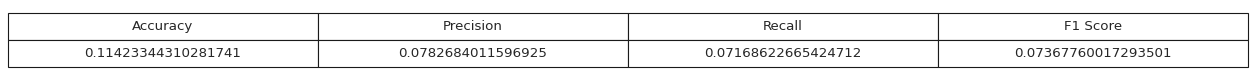

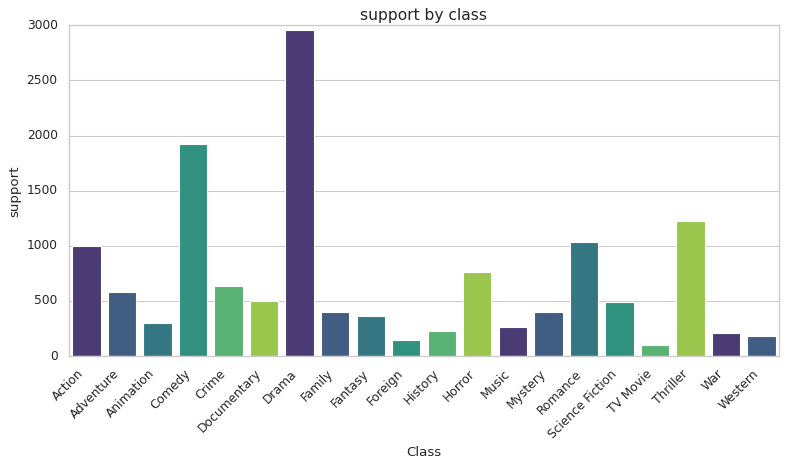

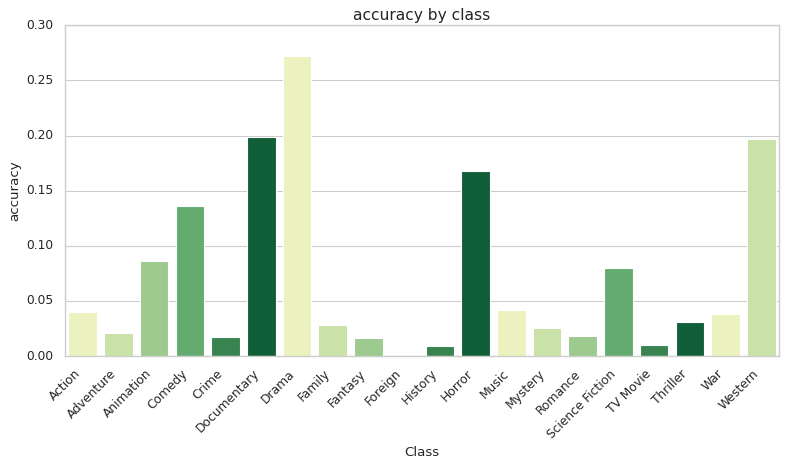

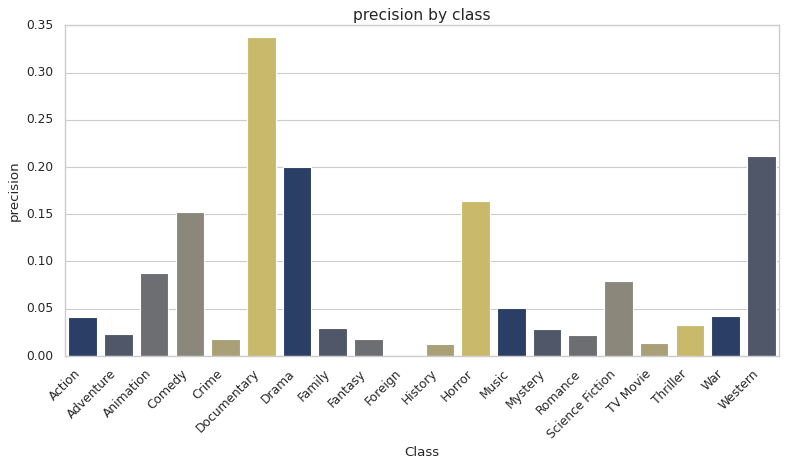

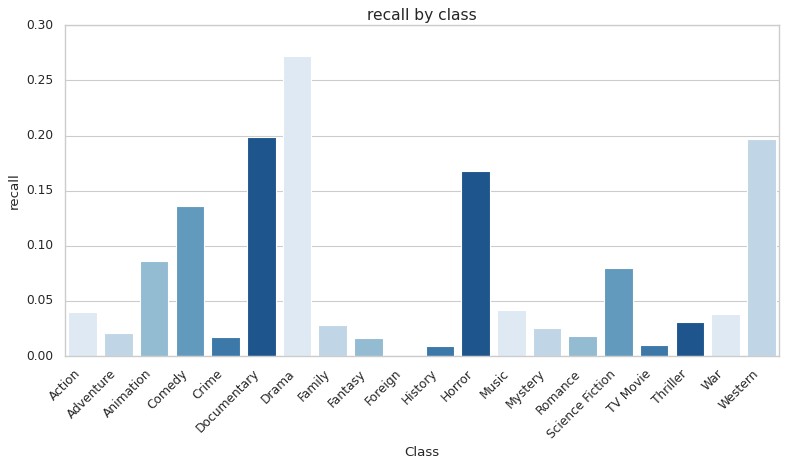

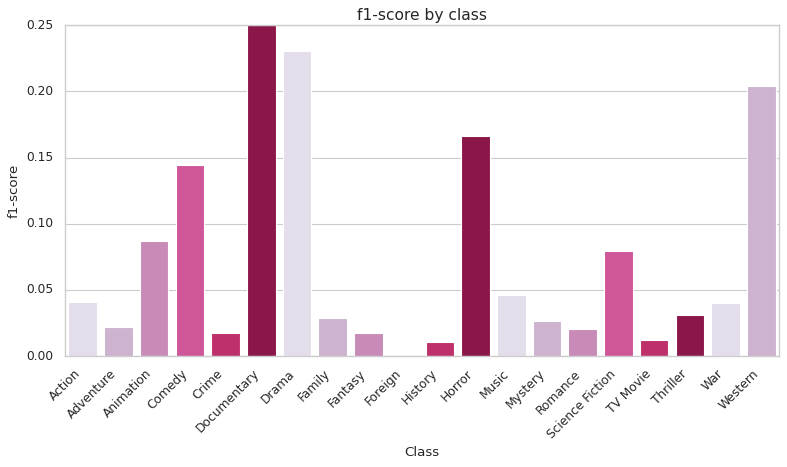

In [167]:
time_rf = fim - inicio
evaluate = Evaluate_Model(X_train,X_test,rf_classifier,y_test,"Random_Forest")
acc_rf = evaluate.Evaluate()

Os resultados de acurácia foram evidentemente ruins, todavia essa análise sera feita de forma minuciosa posteriormente. Todavia é interessante o fato de gêneros como "Western" e "Documentary" possuirem acurárias relativamente altas comparadas aos demais mesmo com pouca quantidade de dados dessas classes.

#### <span style="color:white">Logistic Regression</span>

In [132]:
lr_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000)

In [133]:
inicio = time.time()
lr_classifier.fit(X_train, y_train)
fim = time.time()

{'0': {'precision': 0.09680851063829787, 'recall': 0.09118236472945891, 'f1-score': 0.09391124871001032, 'support': 998.0}, '1': {'precision': 0.06128133704735376, 'recall': 0.03806228373702422, 'f1-score': 0.04695837780149413, 'support': 578.0}, '2': {'precision': 0.1452991452991453, 'recall': 0.11258278145695365, 'f1-score': 0.12686567164179105, 'support': 302.0}, '3': {'precision': 0.21868787276341947, 'recall': 0.2286902286902287, 'f1-score': 0.22357723577235772, 'support': 1924.0}, '4': {'precision': 0.07259953161592506, 'recall': 0.04889589905362776, 'f1-score': 0.05843543826578699, 'support': 634.0}, '5': {'precision': 0.4189723320158103, 'recall': 0.2145748987854251, 'f1-score': 0.2838018741633199, 'support': 494.0}, '6': {'precision': 0.2518189884649512, 'recall': 0.480365605958023, 'f1-score': 0.3304226336011177, 'support': 2954.0}, '7': {'precision': 0.0695364238410596, 'recall': 0.053164556962025315, 'f1-score': 0.060258249641319934, 'support': 395.0}, '8': {'precision': 0.

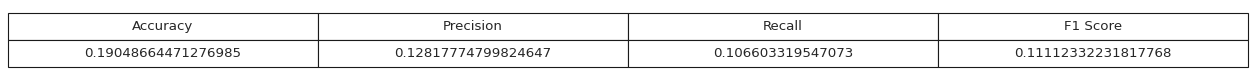

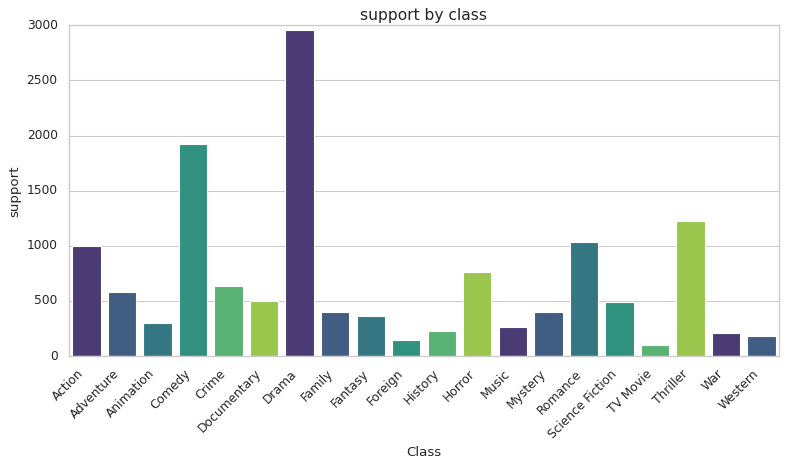

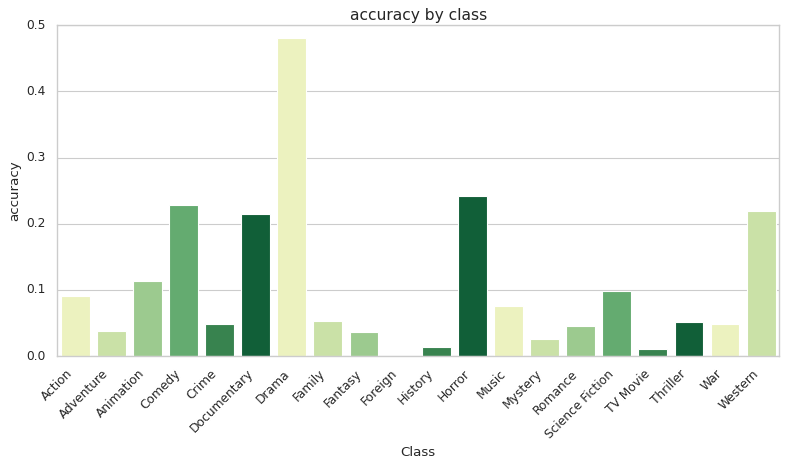

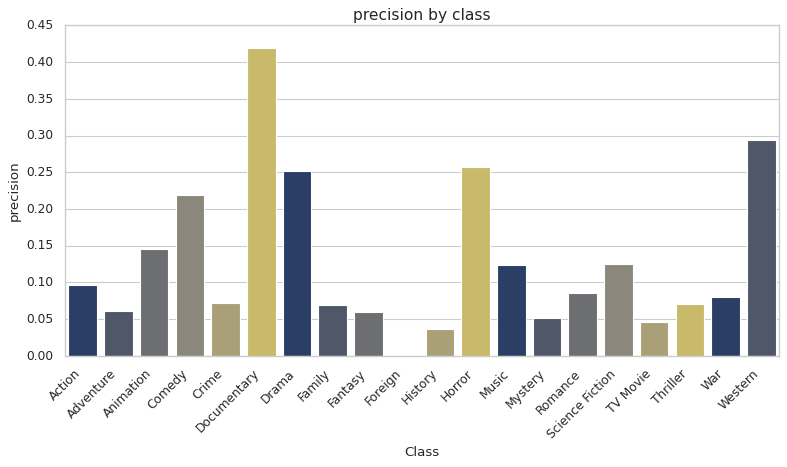

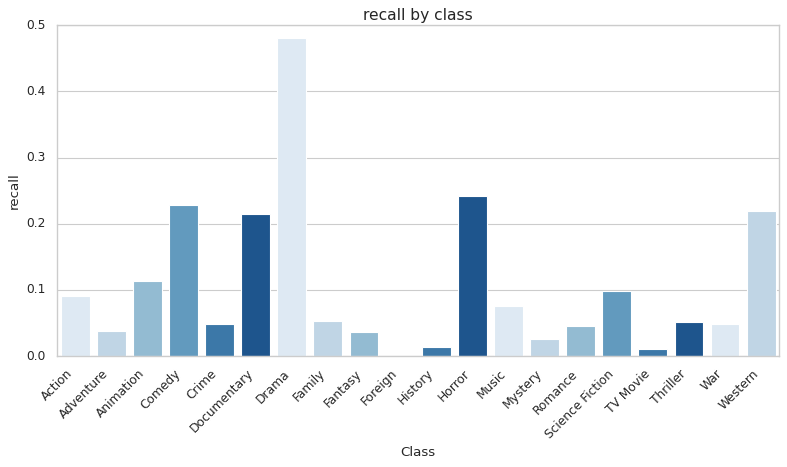

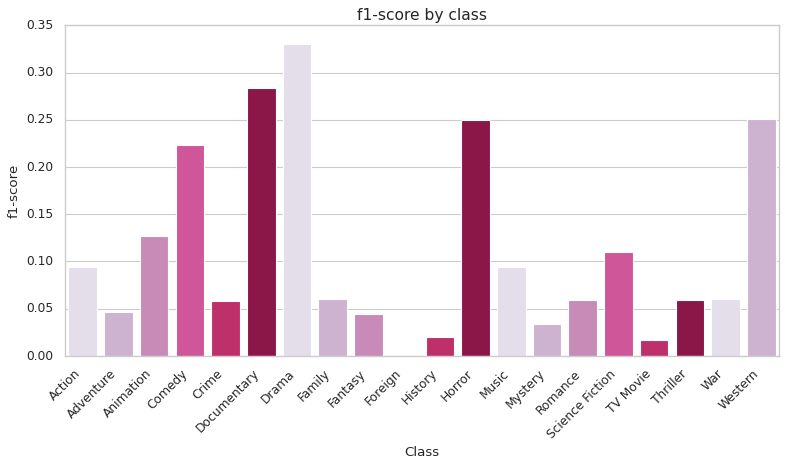

In [134]:
time_lr = fim - inicio
evaluate = Evaluate_Model(X_train,X_test,lr_classifier,y_test,"Logistic_Regression")
acc_lr = evaluate.Evaluate()

Os resultados de acurácia foram evidentemente ruins, todavia essa análise sera feita de forma minuciosa posteriormente.

#### <span style="color:white">Comparação de tempo de treino e de acurácia dos modelos "Logistic Regression" e "Random Forest"</span>

In [135]:
def plot_bar_df(paleta,data,x,y,Titulo):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    palette = sns.color_palette(f'{paleta}')
    warnings.filterwarnings("ignore")
    ax = sns.barplot(x=x, y=y,data= data, palette=palette,hue = 'Modelo',legend=False)
    warnings.filterwarnings("default")
    plt.xlabel(x, fontsize=12)
    plt.ylim(0, max(data[y]) * 1.5) 
    plt.ylabel(y, fontsize=12)
    plt.title(Titulo, fontsize=14)
    plt.tight_layout()
    plt.show()

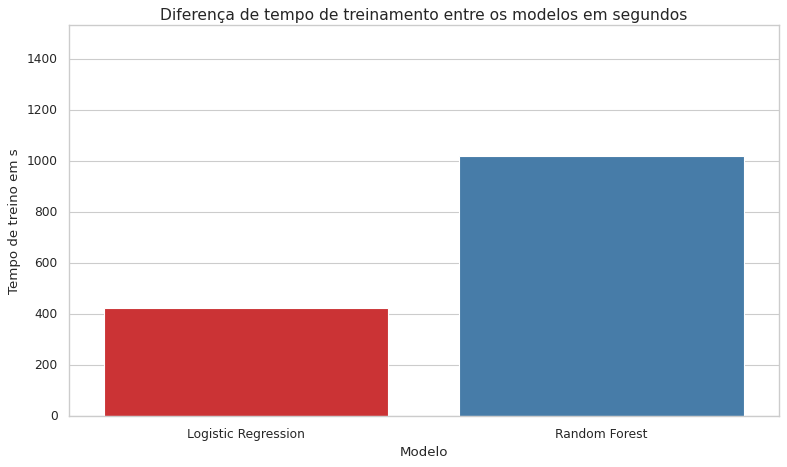

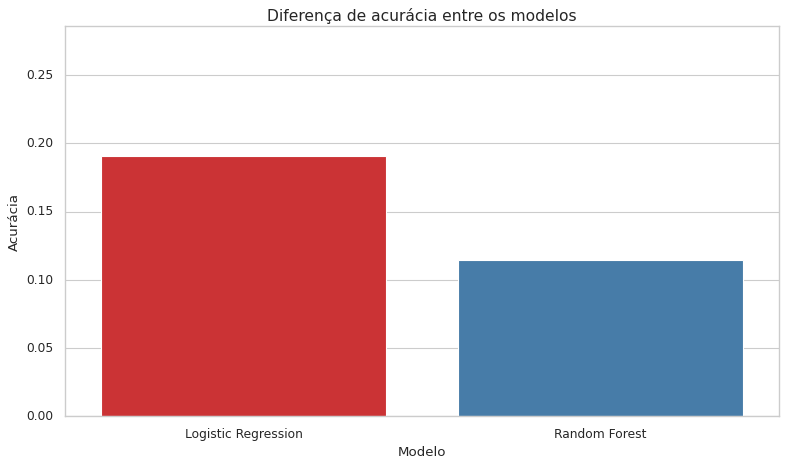

In [136]:
data = pd.DataFrame({'Tempo de treino em s': [time_lr,time_rf],'Modelo': ['Logistic Regression','Random Forest']})
plot_bar_df("Set1",data,'Modelo','Tempo de treino em s','Diferença de tempo de treinamento entre os modelos em segundos')

data = pd.DataFrame({'Acurácia': [acc_lr,acc_rf],'Modelo': ['Logistic Regression','Random Forest']})
plot_bar_df("Set1",data,'Modelo','Acurácia','Diferença de acurácia entre os modelos')

Como podemos ver a regressão logística teve um desempenho melhor com maior acurácia, dando a entender que a montagem da floresta é custosa e difícil, não conseguindo atributos suficientes para uma melhor diferenciação das classes.

Testaremos agora KNN com vários k diferentes para tentar chegar em uma acurácia alta de modelo. Ao final das implementações temos um comparativo de resultados.

#### <span style="color:white">KNN com 1 vizinho</span>

In [137]:
knn_classifier1 = KNeighborsClassifier(n_neighbors=1)

In [138]:
knn_classifier1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

{'0': {'precision': 0.030784508440913606, 'recall': 0.031062124248496994, 'f1-score': 0.03092269326683292, 'support': 998.0}, '1': {'precision': 0.022530329289428077, 'recall': 0.02249134948096886, 'f1-score': 0.02251082251082251, 'support': 578.0}, '2': {'precision': 0.07333333333333333, 'recall': 0.0728476821192053, 'f1-score': 0.07308970099667773, 'support': 302.0}, '3': {'precision': 0.14553237025147137, 'recall': 0.14137214137214138, 'f1-score': 0.1434220933298181, 'support': 1924.0}, '4': {'precision': 0.013293943870014771, 'recall': 0.014195583596214511, 'f1-score': 0.013729977116704805, 'support': 634.0}, '5': {'precision': 0.26720647773279355, 'recall': 0.13360323886639677, 'f1-score': 0.17813765182186236, 'support': 494.0}, '6': {'precision': 0.14361513972408915, 'recall': 0.13744075829383887, 'f1-score': 0.14046012800553537, 'support': 2954.0}, '7': {'precision': 0.038461538461538464, 'recall': 0.04050632911392405, 'f1-score': 0.03945745992601726, 'support': 395.0}, '8': {'p

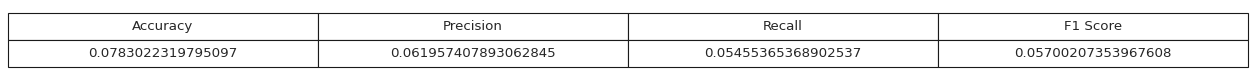

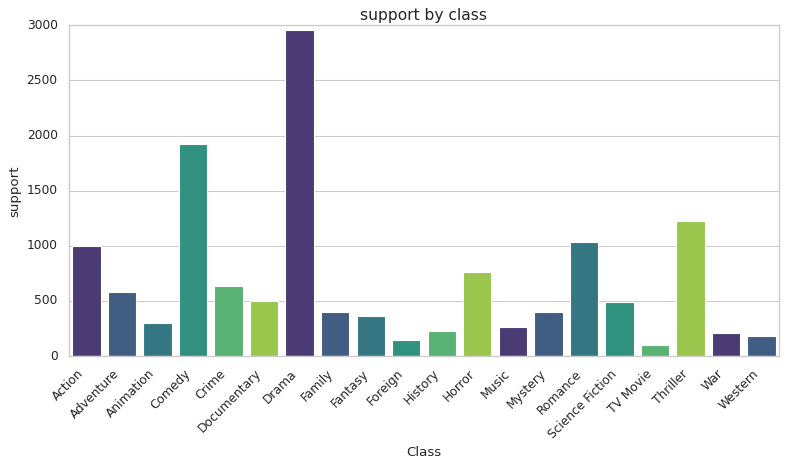

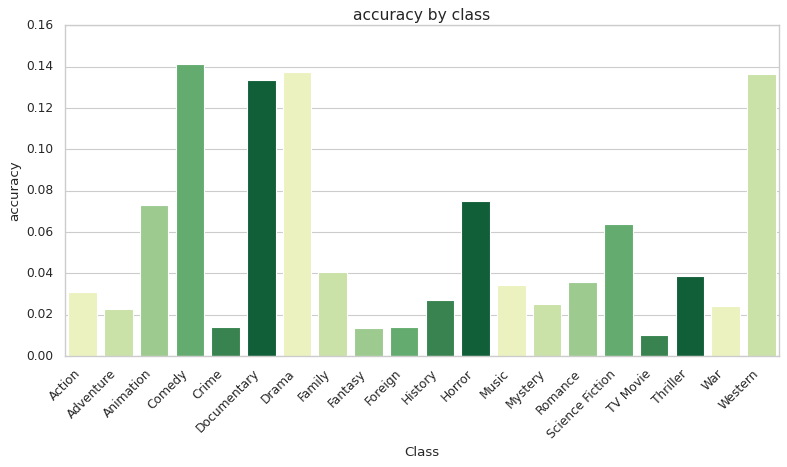

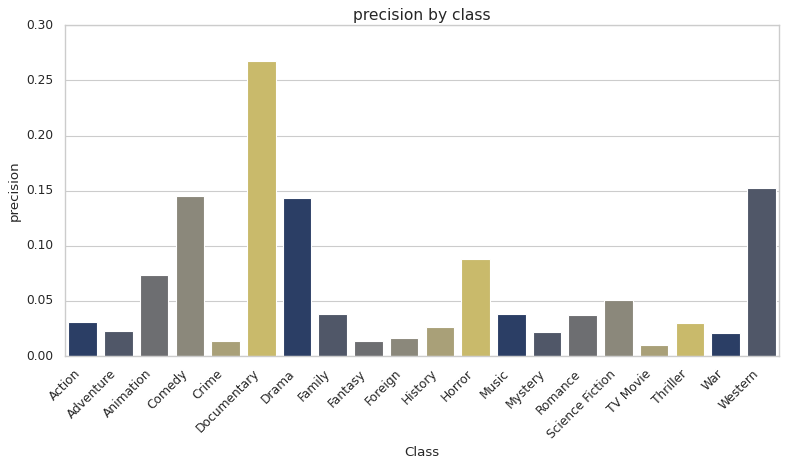

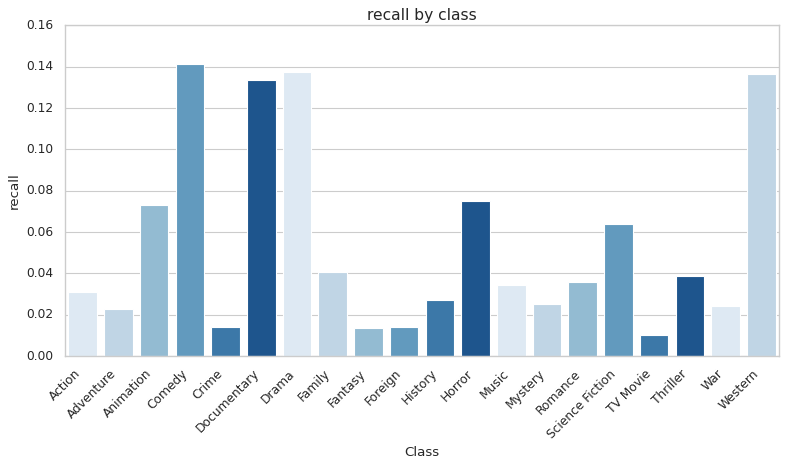

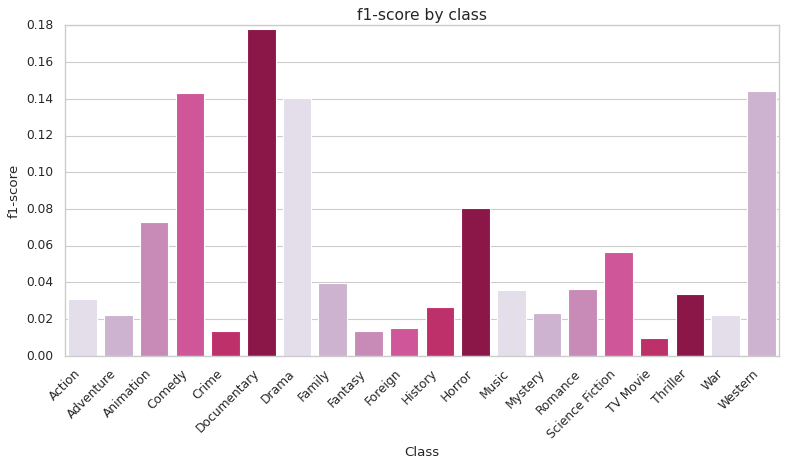

In [139]:
evaluate = Evaluate_Model(X_train,X_test,knn_classifier1,y_test,"KNN_k=1")

inicio = time.time()
acc_knn1 = evaluate.Evaluate()
fim = time.time()

time_knn_1 = fim - inicio

Como esperado, utilizar apenas um vizinho não é o suficiente, tendo pessíma acurácia. Vale ressaltar que uma análise mais profunda da acurácia será feita posteriormente.

#### <span style="color:white">KNN com 10 vizinhos</span>

In [140]:
knn_classifier10 = KNeighborsClassifier(n_neighbors=10)

In [141]:
knn_classifier10.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

{'0': {'precision': 0.15119363395225463, 'recall': 0.1713426853707415, 'f1-score': 0.16063879755753876, 'support': 998.0}, '1': {'precision': 0.07957559681697612, 'recall': 0.05190311418685121, 'f1-score': 0.06282722513089005, 'support': 578.0}, '2': {'precision': 0.18012422360248448, 'recall': 0.19205298013245034, 'f1-score': 0.18589743589743593, 'support': 302.0}, '3': {'precision': 0.20517241379310344, 'recall': 0.3092515592515592, 'f1-score': 0.24668325041459369, 'support': 1924.0}, '4': {'precision': 0.10062893081761007, 'recall': 0.10094637223974763, 'f1-score': 0.10078740157480313, 'support': 634.0}, '5': {'precision': 0.21336459554513482, 'recall': 0.3684210526315789, 'f1-score': 0.2702301410541945, 'support': 494.0}, '6': {'precision': 0.2543619928526382, 'recall': 0.4096140825998646, 'f1-score': 0.3138373751783167, 'support': 2954.0}, '7': {'precision': 0.0855614973262032, 'recall': 0.04050632911392405, 'f1-score': 0.054982817869415807, 'support': 395.0}, '8': {'precision': 0

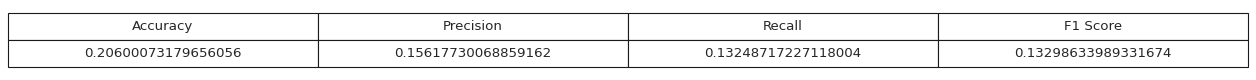

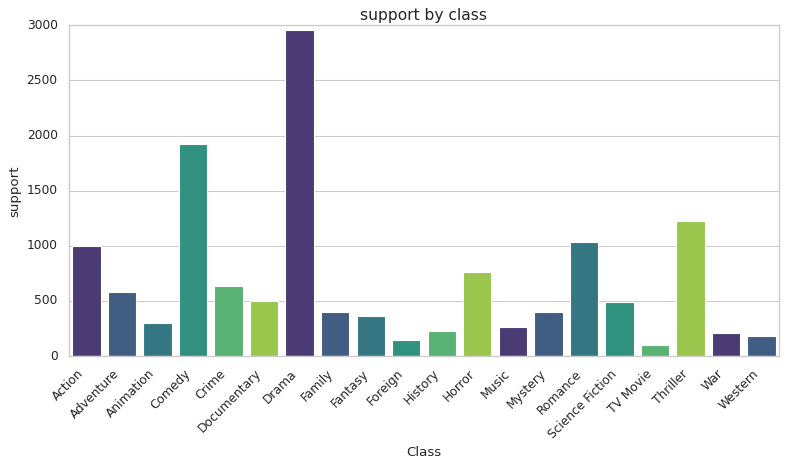

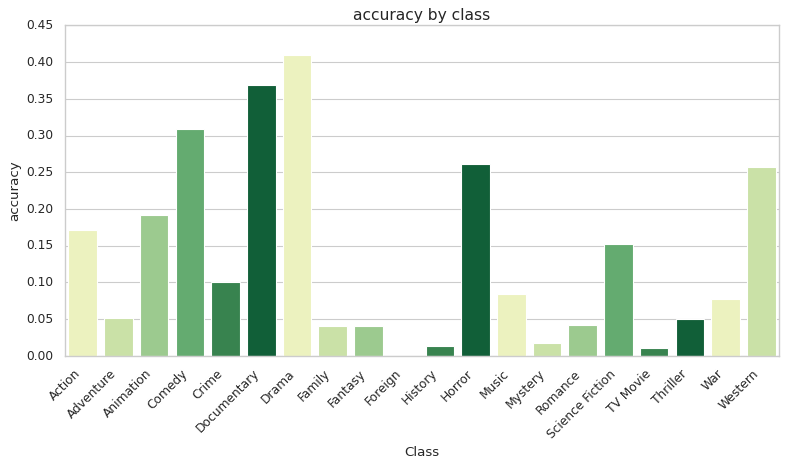

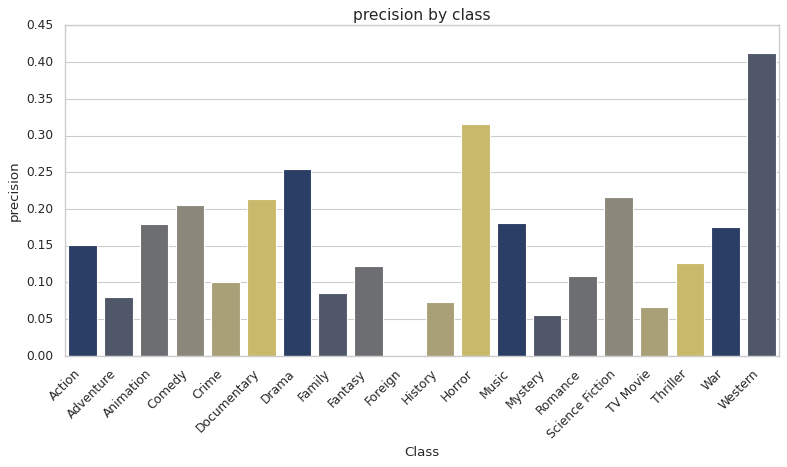

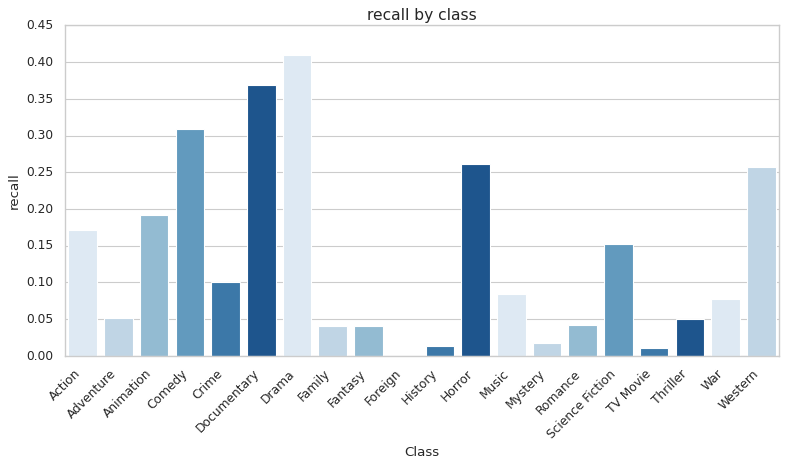

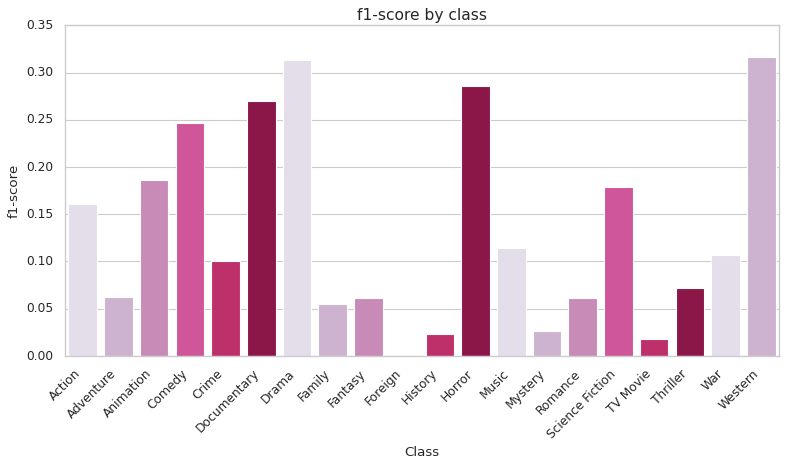

In [142]:
evaluate = Evaluate_Model(X_train,X_test,knn_classifier10,y_test,"KNN_k=10")

inicio = time.time()
acc_knn10 = evaluate.Evaluate()
fim = time.time()

time_knn_10 = fim - inicio

Uma análise mais profunda da acurácia será feita posteriormente.

#### <span style="color:white">KNN com 100 vizinhos</span>

In [143]:
knn_classifier100 = KNeighborsClassifier(n_neighbors=100)

In [144]:
knn_classifier100.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100)

/home/grad/ccomp/22/diogochaves/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/grad/ccomp/22/diogochaves/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/grad/ccomp/22/diogochaves/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

{'0': {'precision': 0.3042168674698795, 'recall': 0.10120240480961924, 'f1-score': 0.1518796992481203, 'support': 998.0}, '1': {'precision': 0.09090909090909091, 'recall': 0.0017301038062283738, 'f1-score': 0.0033955857385398985, 'support': 578.0}, '2': {'precision': 0.2710843373493976, 'recall': 0.1490066225165563, 'f1-score': 0.19230769230769232, 'support': 302.0}, '3': {'precision': 0.19901373723141952, 'recall': 0.29365904365904366, 'f1-score': 0.23724543355028344, 'support': 1924.0}, '4': {'precision': 0.2026431718061674, 'recall': 0.07255520504731862, 'f1-score': 0.10685249709639953, 'support': 634.0}, '5': {'precision': 0.4230769230769231, 'recall': 0.022267206477732792, 'f1-score': 0.04230769230769231, 'support': 494.0}, '6': {'precision': 0.2517123287671233, 'recall': 0.7464454976303317, 'f1-score': 0.37647259689260715, 'support': 2954.0}, '7': {'precision': 0.20408163265306123, 'recall': 0.05063291139240506, 'f1-score': 0.08113590263691683, 'support': 395.0}, '8': {'precision

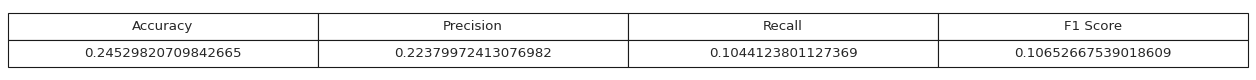

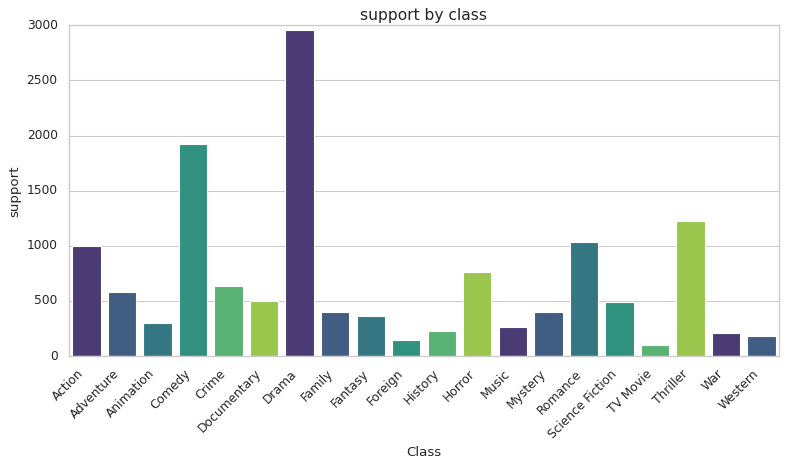

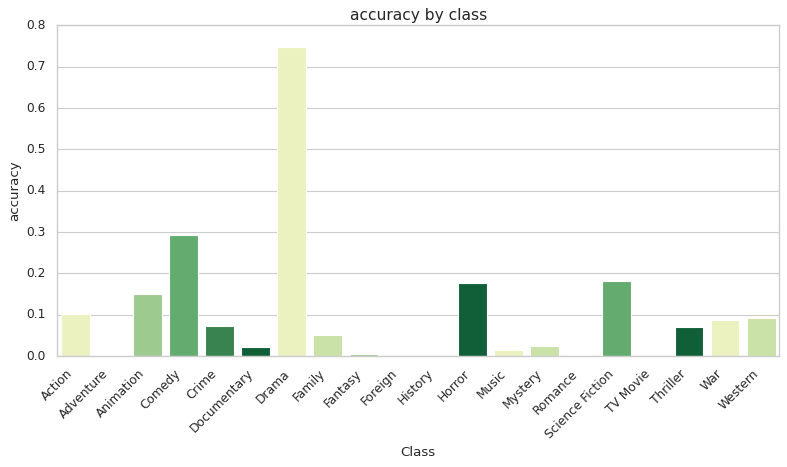

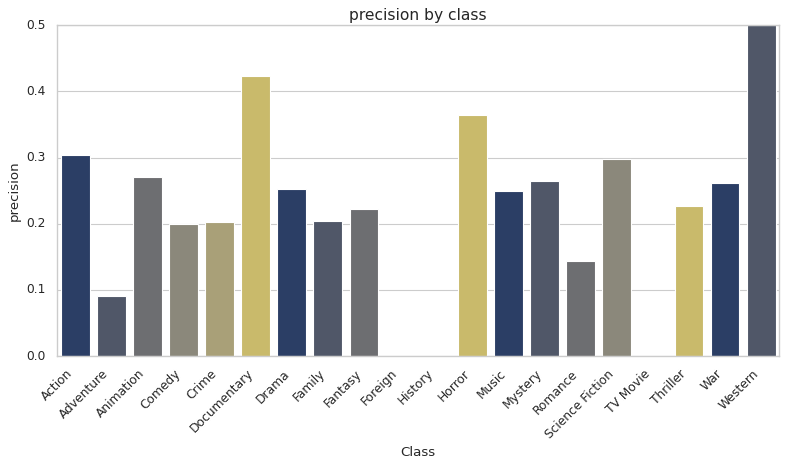

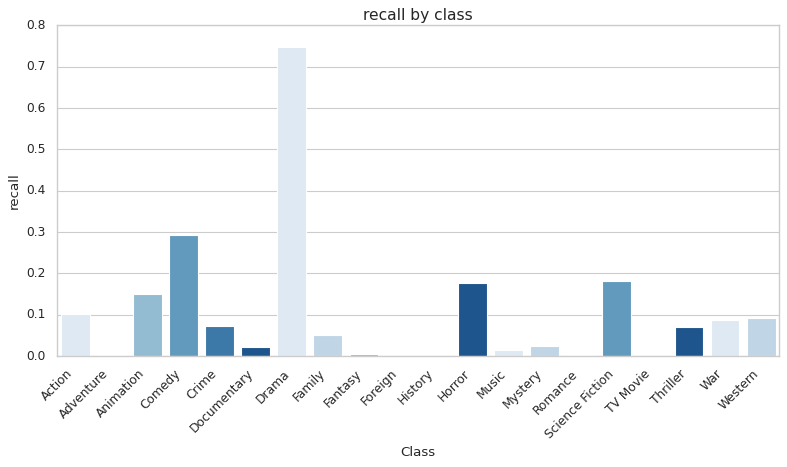

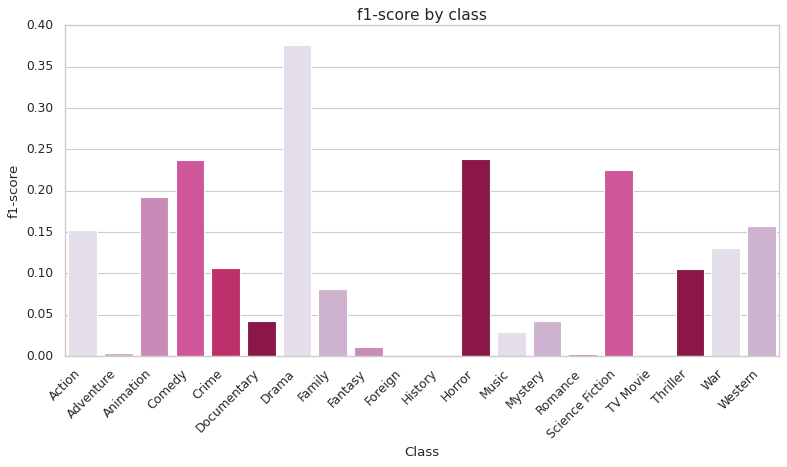

In [145]:
evaluate = Evaluate_Model(X_train,X_test,knn_classifier100,y_test,"KNN_k=100")

inicio = time.time()
acc_knn100 = evaluate.Evaluate()
fim = time.time()

time_knn_100 = fim - inicio

Uma análise mais profunda da acurácia será feita posteriormente.

#### <span style="color:white">KNN com 1000 vizinhos</span>

In [146]:
knn_classifier1000 = KNeighborsClassifier(n_neighbors=1000)

In [147]:
knn_classifier1000.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1000)

/home/grad/ccomp/22/diogochaves/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/grad/ccomp/22/diogochaves/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/grad/ccomp/22/diogochaves/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 998.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 578.0}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 302.0}, '3': {'precision': 0.3358395989974937, 'recall': 0.06964656964656965, 'f1-score': 0.11536805854498493, 'support': 1924.0}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 634.0}, '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 494.0}, '6': {'precision': 0.21860394994723353, 'recall': 0.9817197020988491, 'f1-score': 0.35758323057953145, 'support': 2954.0}, '7': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 395.0}, '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 366.0}, '9': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 145.0}, '10': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 223.0}, '11': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 761.0}, '

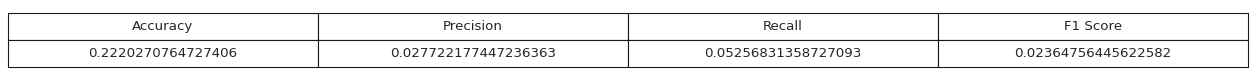

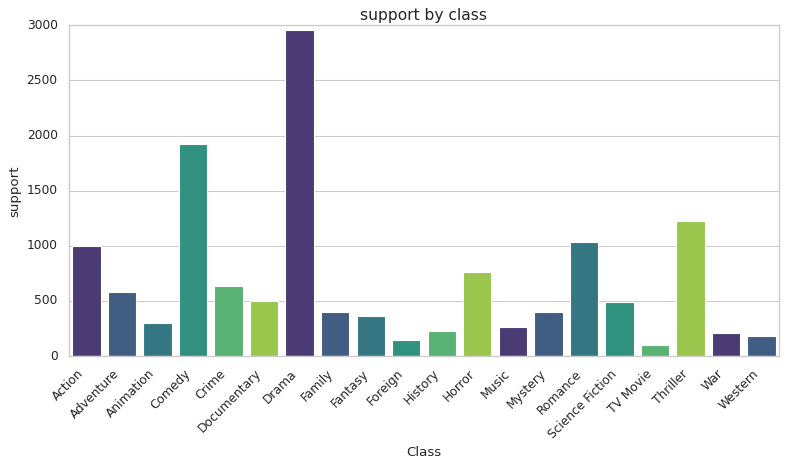

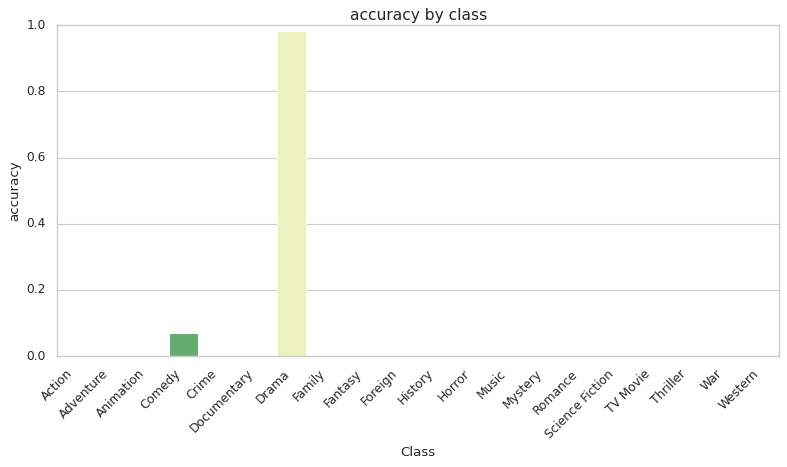

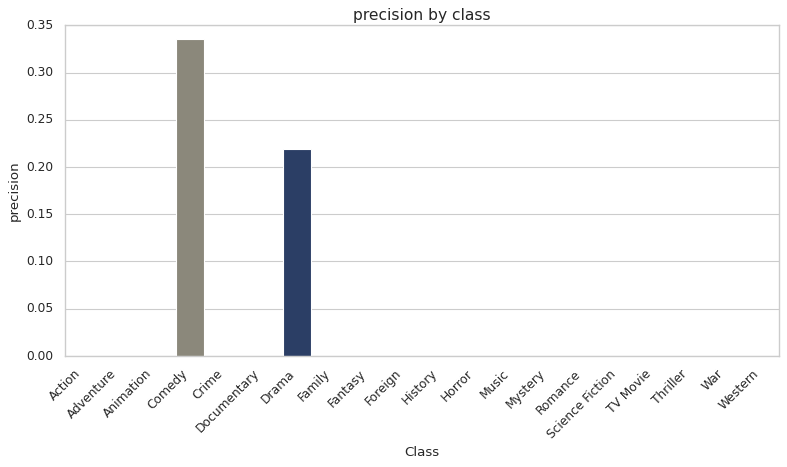

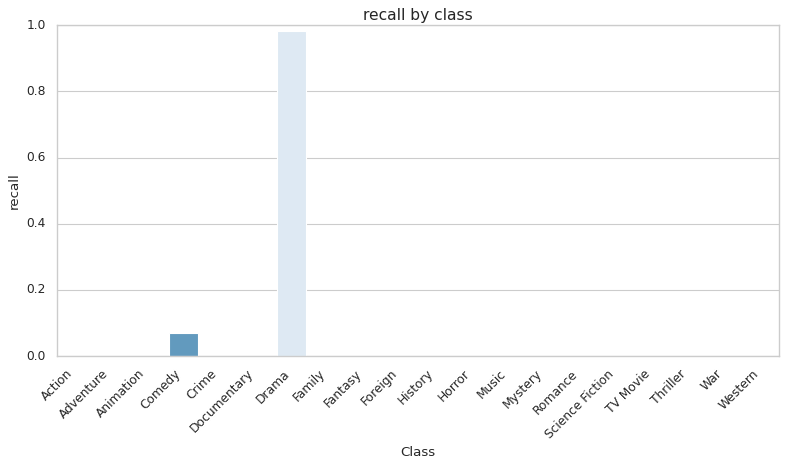

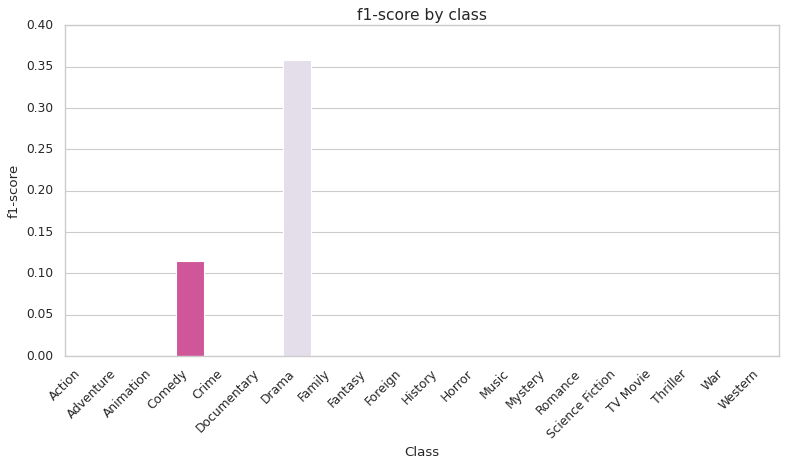

In [148]:
evaluate = Evaluate_Model(X_train,X_test,knn_classifier1000,y_test,"KNN_k=1000")

inicio = time.time()
acc_knn1000 = evaluate.Evaluate()
fim = time.time()

time_knn_1000 = fim - inicio

É interessante analisar que a maioria das classes não são escolhidas quando k é muito grande, isso se deve ao fato de que as classes em maior quantidade passam a sobressair as que estão em menor quantidade e todos os pontos são classificados como uma dessas de maior quantidade. Uma análise mais profunda da acurácia será feita posteriormente.

#### <span style="color:white">Comparação de tempo de teste e de acurácia do modelo de KNN com diferentes n_neighbors</span>

In [149]:
def plot_line_df(paleta,x,y,Titulo,xlabel,ylabel):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    palette = sns.color_palette(f'{paleta}')
    warnings.filterwarnings("ignore")
    ax = sns.lineplot(x=x, y=y, palette=palette)
    warnings.filterwarnings("default")
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(Titulo, fontsize=14)
    plt.tight_layout()
    plt.show()

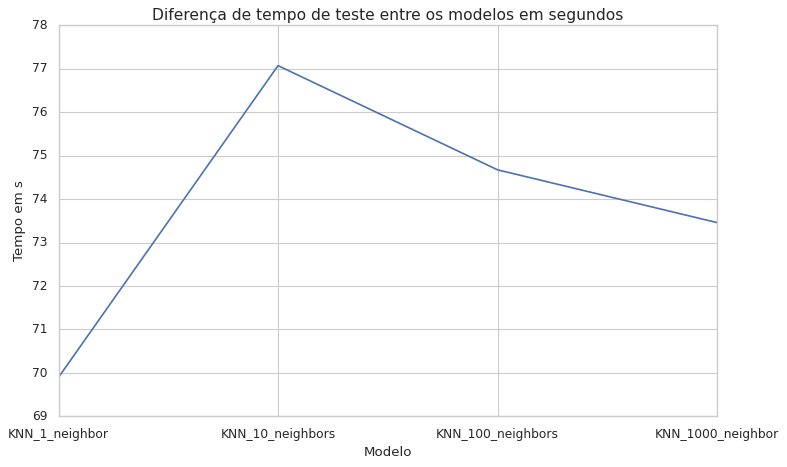

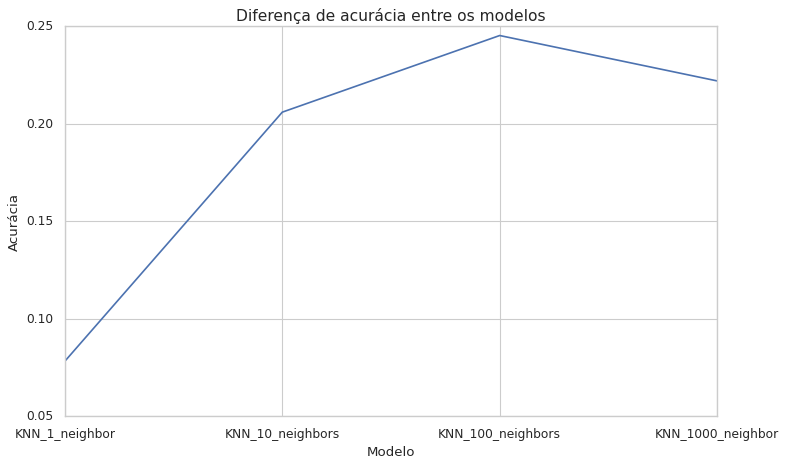

In [150]:
plot_line_df("Set1",["KNN_1_neighbor","KNN_10_neighbors","KNN_100_neighbors","KNN_1000_neighbor"],[time_knn_1,time_knn_10,time_knn_100,time_knn_1000],"Diferença de tempo de teste entre os modelos em segundos","Modelo","Tempo em s")
plot_line_df("Set1",["KNN_1_neighbor","KNN_10_neighbors","KNN_100_neighbors","KNN_1000_neighbor"],[acc_knn1,acc_knn10,acc_knn100,acc_knn1000],'Diferença de acurácia entre os modelos',"Modelo","Acurácia")

Como podemos ver a melhor acurácia foi a knn com 100 vizinhos, com um tempo de teste próximo aos demais. Uma possível duvida seria se esse modelo poderia ser melhor com um k entre 100 e 1000, logo testamos com k igual a 125 para ter uma ideia.

#### <span style="color:white">KNN com 125 vizinhos para análise do gráfico</span>

Para dar uma olhada se logo para valores de n um pouco maiores que 100 a acurácia sobe, desce ou continua similar.

In [151]:
knn_classifier125 = KNeighborsClassifier(n_neighbors=125)


In [152]:
knn_classifier125.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=125)

/home/grad/ccomp/22/diogochaves/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/grad/ccomp/22/diogochaves/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/grad/ccomp/22/diogochaves/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

{'0': {'precision': 0.3087719298245614, 'recall': 0.08817635270541083, 'f1-score': 0.13717848791894, 'support': 998.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 578.0}, '2': {'precision': 0.2795031055900621, 'recall': 0.1490066225165563, 'f1-score': 0.19438444924406048, 'support': 302.0}, '3': {'precision': 0.1981335247666906, 'recall': 0.2869022869022869, 'f1-score': 0.23439490445859873, 'support': 1924.0}, '4': {'precision': 0.1925925925925926, 'recall': 0.04100946372239748, 'f1-score': 0.06762028608582575, 'support': 634.0}, '5': {'precision': 0.6363636363636364, 'recall': 0.01417004048582996, 'f1-score': 0.027722772277227723, 'support': 494.0}, '6': {'precision': 0.24711014176663032, 'recall': 0.7670954637779283, 'f1-score': 0.37380402507423294, 'support': 2954.0}, '7': {'precision': 0.19753086419753085, 'recall': 0.04050632911392405, 'f1-score': 0.06722689075630253, 'support': 395.0}, '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 366.

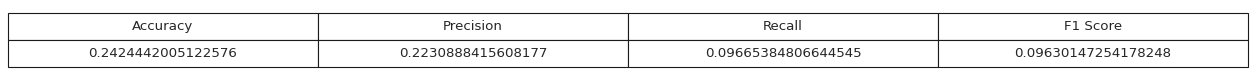

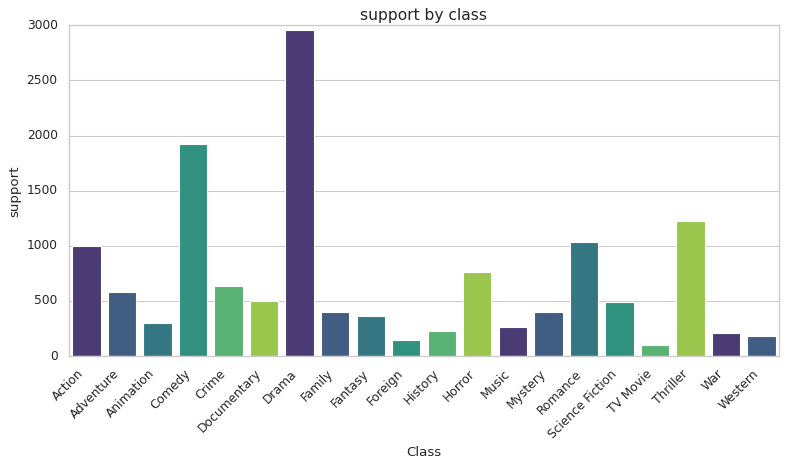

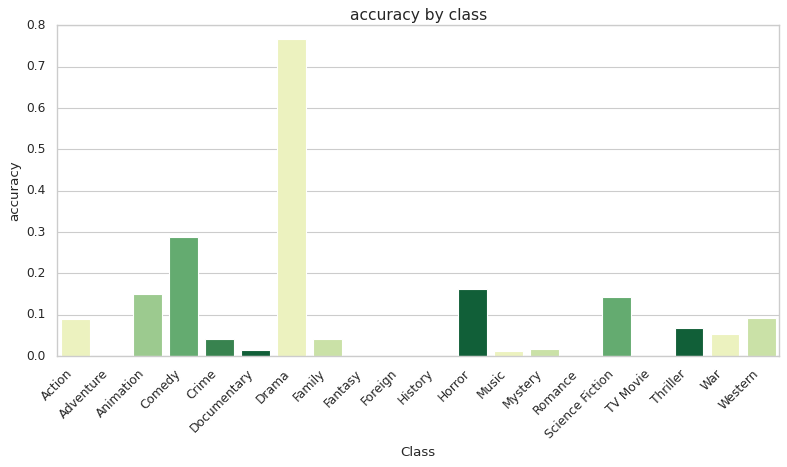

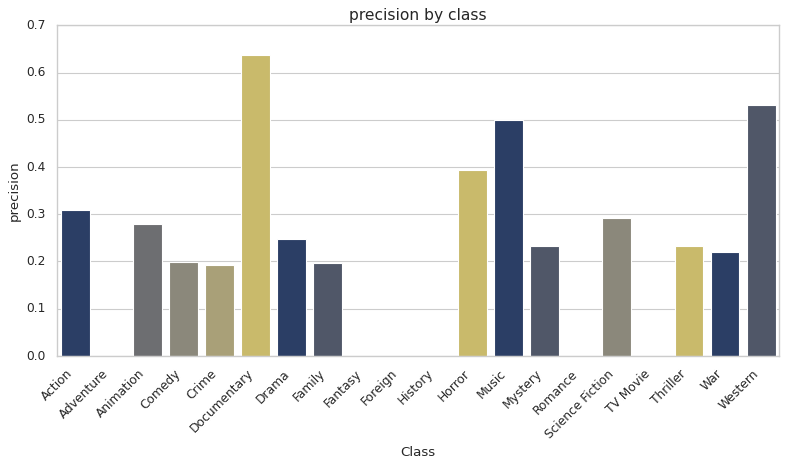

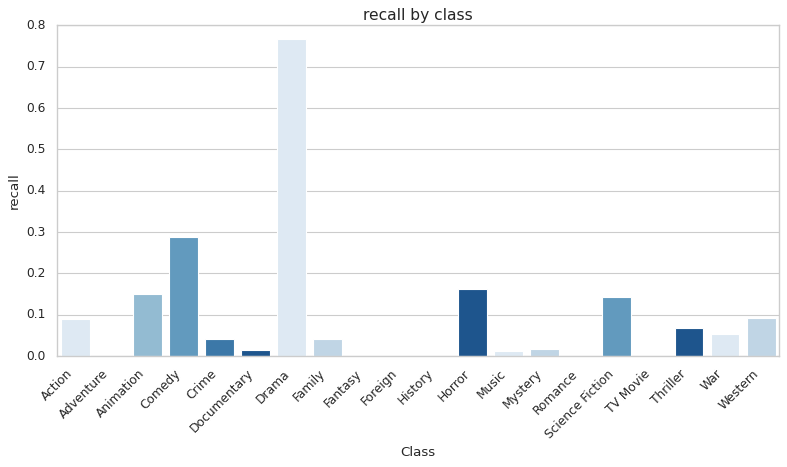

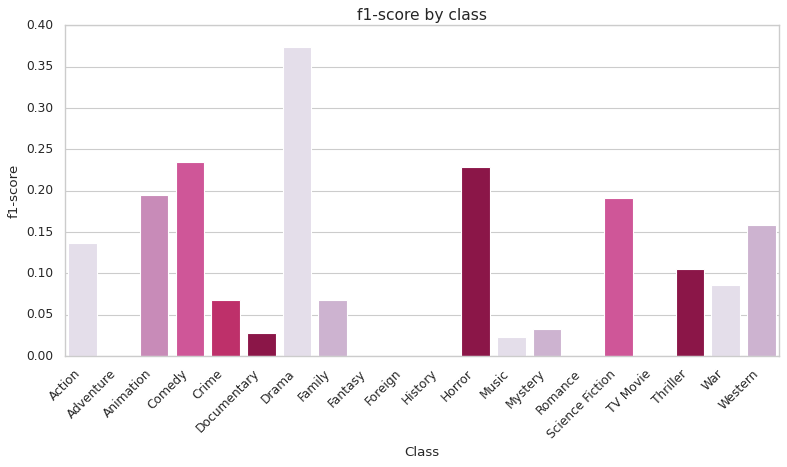

In [153]:
evaluate = Evaluate_Model(X_train,X_test,knn_classifier125,y_test,"KNN_k=80")

inicio = time.time()
acc_knn125 = evaluate.Evaluate()
fim = time.time()

time_knn_125 = fim - inicio

Logo, ela permanece com valores similares sendo n = 100 provavelmente bastante próximo do ideal

## <span style="color:white">Teste de Hipotese e Conclusão</span>

##### $H_0$ = A acurácia dos modelos não tem relação com aprendizado e foram obtidas de forma aleatória.Ou seja o modelo não está aprendendo

Iremos criar várias "Dummy classifications" que não levam em consideração os dados de entrada e classificam os dados com base na aleatóriedade (seguindo a probabilidade de ocorrência de cada classe) e pegar a acurácia de cada um. Criando várias dessas classificações podemos montar um histograma de acurácia e estabelecer um intervalo de confiança de onde as acurácias de cada modelo em teoria iriam cair caso a hipótese nula seja verdadeira. Dessa forma, se as acurácias cairem nesse intervalo teremos que a hipótese nula é verdadeira, caso contrário podemos rejeita-la. Além disso, a acurácia é a média de acertos, ou seja, em teoria convergir para uma normal seguindo o Teorema Central do Limite.

### <span style="color:white">Dummy classifications</span>


In [29]:
Coun = analise.groupby(['gender']).count().reset_index()
Coun = Coun.drop(columns=['id','title'])
Coun

,gender,keywords
0,Action,5084
1,Adventure,2874
2,Animation,1423
3,Comedy,9346
4,Crime,3458
5,Documentary,2505
6,Drama,15013
7,Family,2033
8,Fantasy,1878
9,Foreign,748


In [30]:
Coun = Coun.rename(columns={'keywords':'count'})
som = Coun.loc[:,'count'].sum()

In [31]:
probabilidades_classe = []
for c in Coun.loc[:,'count']:
    probabilidades_classe.append(c/som)

In [48]:
n = 1000
medias = np.zeros(n)
count = 1
for i in tqdm(range(n), desc=f'MONTAGEM',dynamic_ncols=True,colour="MAGENTA"):
    y_pred = []

    for valor in range(len(y_test)):
        numero_gerado = random.choices(range(20), weights=probabilidades_classe)
        y_pred.append(numero_gerado)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    medias[i] = accuracy
        
    count = count + 1


    

MONTAGEM: 100%|██████████| 1000/1000 [05:34<00:00,  2.99it/s]


In [ ]:
IC1 = np.percentile(medias, 0.5)
IC2 = np.percentile(medias, 99.5)

In [95]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


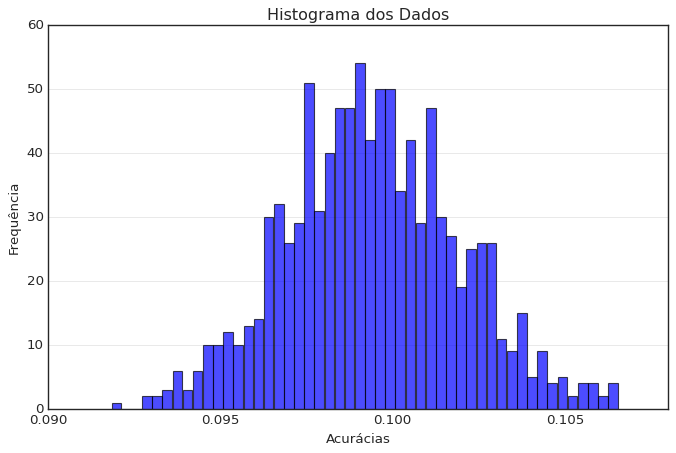

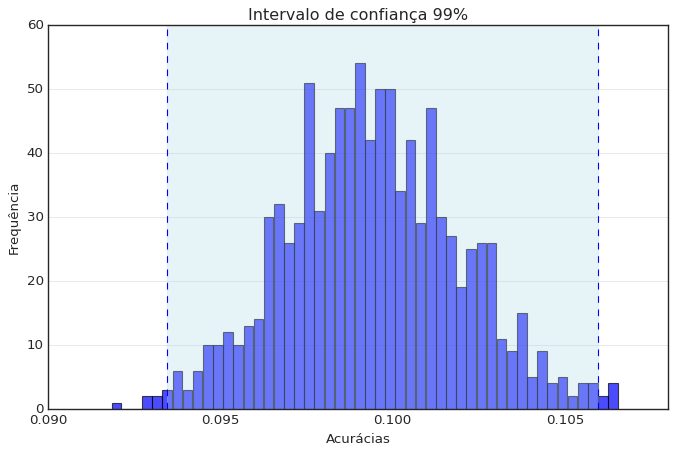

In [127]:
plt.style.use('seaborn-v0_8-white')

plt.figure(figsize=(10, 6))
plt.hist(medias, bins=50, alpha=0.7, color='blue',edgecolor='black', rwidth=0.95)
plt.title('Histograma dos Dados')
plt.xlabel('Acurácias')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.style.use('seaborn-v0_8-white')

plt.figure(figsize=(10, 6))
plt.hist(medias, bins=50, alpha=0.7, color='blue',edgecolor='black', rwidth=0.95)
plt.title('Intervalo de confiança 99%')
plt.xlabel('Acurácias')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.axvline(IC1, color='blue', linestyle='--')
plt.axvline(IC2, color='blue', linestyle='--')
plt.axvspan(IC1, IC2, color='lightblue', alpha=0.3)
plt.show()

### <span style="color:white">Resultados</span>


In [164]:
def plot_accu(ac,model):
    plt.figure(figsize=(10, 6))
    plt.hist(medias, bins=20, alpha=0.7, color='blue',edgecolor='black', rwidth=0.95)
    plt.title(f'Acurácia do modelo {model} comparada com o intervalo de confiança de 99%')
    plt.xlabel('Acurácias')
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.75)
    plt.axvline(IC1, color='blue', linestyle='--')
    plt.axvline(IC2, color='blue', linestyle='--')
    plt.axvspan(IC1, IC2, color='lightblue', alpha=0.3)
    plt.axvline(ac, color='red', linestyle='--')

    plt.show()

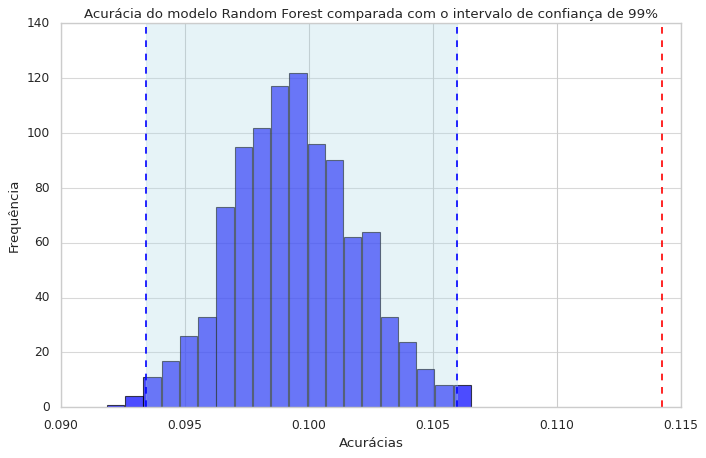

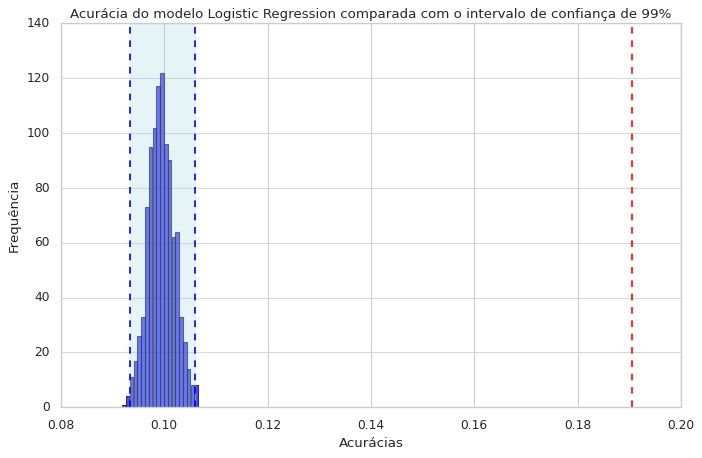

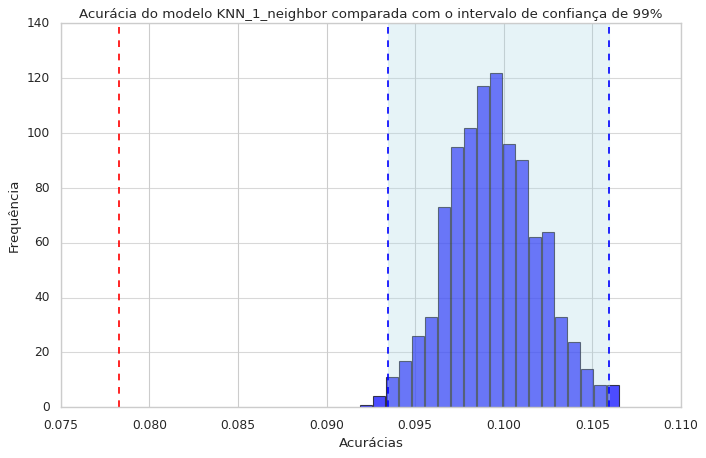

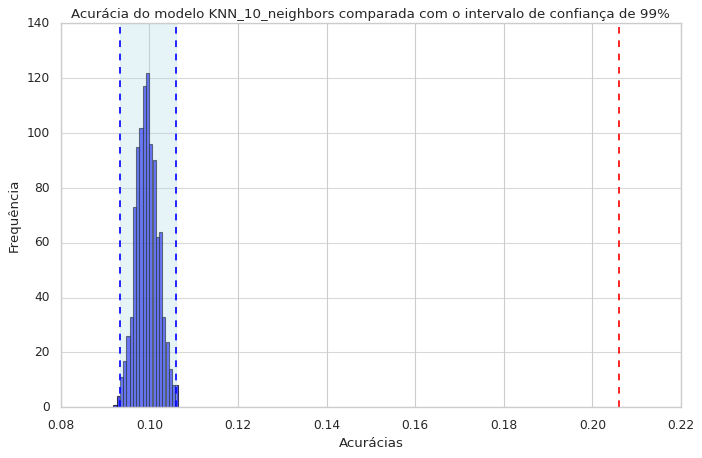

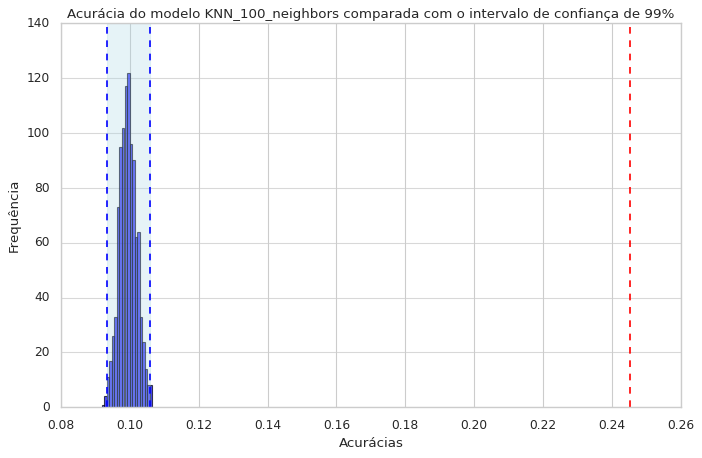

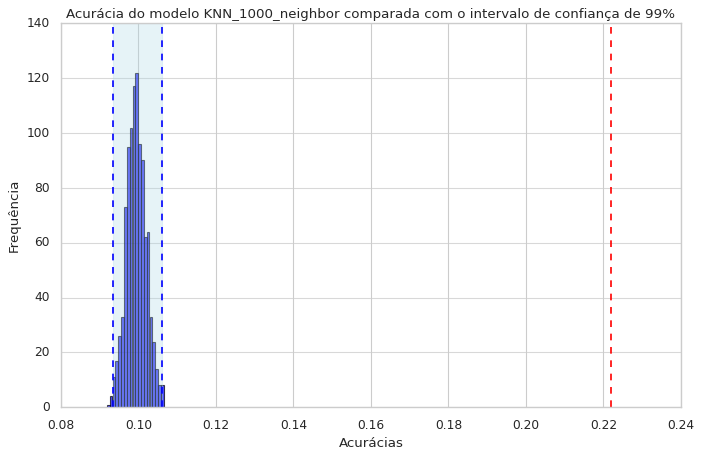

In [165]:
ac = [acc_rf,acc_lr,acc_knn1,acc_knn10,acc_knn100,acc_knn1000]
mod = ["Random Forest",'Logistic Regression',"KNN_1_neighbor","KNN_10_neighbors","KNN_100_neighbors","KNN_1000_neighbor"]
for i in range(len(ac)):
    plot_accu(ac[i],mod[i])

###
Todos os modelos estão fora do intervalo de confiança de 99%, logo a hipótese nula é rejeitada. É importante ressaltar que o knn com n igual a 1 tem uma acurácia bem menor que o do intervalo de confiança, mostrando que até mesmo a aleatoriedade ganha desse modelo implementado dessa forma. Todavia, todos os outros modelos apresentaram acurácias maiores que a prevista no intervalo de confiança da aleatóriedade, mostrando que os modelos de fato aprenderam alguma coisa e existe uma relação, mesmo que baixa (acurácia baixa dos modelos), entre as palavras chave do filme e seu gênero. Por fim, é válido salientar novamente que a acurácia dos modelos, mesmo que acima das esperadas na aleatóriedade, são muito baixas, dessa forma não é possível prever o gênero a partir das palavras chave do filme usando a abordagem que envolve "Bag of Words" e modelos de machine learning.